# Assignemnt1
## Mehrzad Mortazavi
### Part2

First, reading the data into the variables:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D
from numpy.linalg import inv
train =  (np.genfromtxt('Dataset_2_train.csv', delimiter=',',dtype=float))[:,0:2]
val   =  (np.genfromtxt('Dataset_2_valid.csv', delimiter=',',dtype=float))[:,0:2]
test  =  (np.genfromtxt('Dataset_2_test.csv', delimiter=',', dtype=float))[:,0:2]

In [2]:
print train.shape
print val.shape
print test.shape

(300, 2)
(100, 2)
(100, 2)


In [3]:
X = train[:,0:1]
Y = train[:,1:2]
Xv = val[:,0:1]
Yv = val[:,1:2]
Xt = test[:,0:1]
Yt = test[:,1:2]
print Yv.shape

(100, 1)


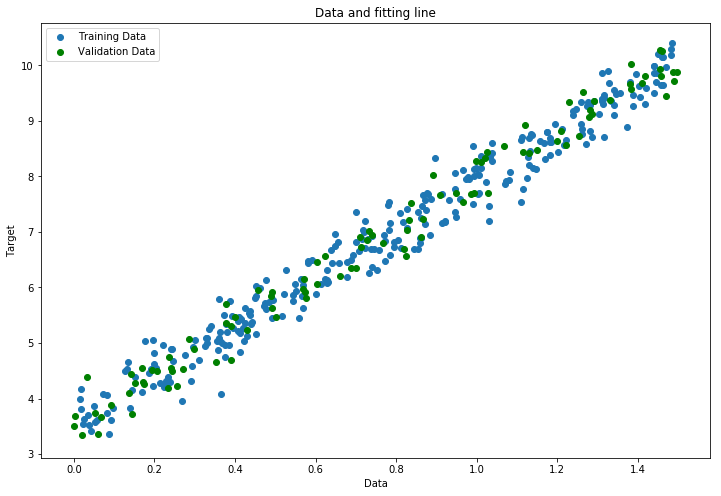

In [4]:
#Plotting data

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.set_title('Data and fitting line')
ax.scatter(x=X,y=Y,label='Training Data')
ax.scatter(x=Xv,y=Yv,label='Validation Data',color='green')
ax.set_xlabel('Data')
ax.set_ylabel('Target')
ax.legend(loc='best');
plt.show()

In [5]:
indexV= np.random.permutation(val.shape[0])
print indexV.shape
print X.shape


(100,)
(300, 1)


In [6]:
order = 1
#Appending bias to training data
myX = np.ones((X.shape[0],order+1), dtype=np.float)
for i in range(order+1):
    myX[:,i:i+1] =  np.power(X, order-i)

#Appending bias to validation data 
myXv = np.ones((Xv.shape[0],order+1), dtype=np.float)
for i in range(order+1):
    myXv[:,i:i+1] =  np.power(Xv, order-i)
    
myXt = np.ones((Xt.shape[0],order+1), dtype=np.float)
for i in range(order+1):
    myXt[:,i:i+1] =  np.power(Xt, order-i)

print myX.shape
print myXv.shape
print myXt.shape

(300, 2)
(100, 2)
(100, 2)


# Learning with 1e-6 learning rate and SGD
Since the data seems to be a line, W is initialized with 1 and 1

In [26]:
W =np.ones((2,1), dtype=np.float)
epochs = 10000
alpha = 1e-5
MSEvalidation = np.zeros((epochs,1))
MSETest       = np.zeros((epochs,1))
MSETrain      = np.zeros((epochs,1))
Warray        = np.zeros((epochs,2,1))
counter =0
Threshold = 1e-05
for i in range(epochs):
    index= np.random.permutation(train.shape[0])
    #Iterate over dataset for epochs times
    Warray[counter] = W
    for j in range(train.shape[0]):
        data = np.array(myX[index[j],:]).reshape((1, 2))
        eder = - alpha*2*(np.dot(np.dot(data.T,data),W) - np.dot(data.T,Y[index[j]]).reshape(2,1))
        W = W + eder;  
    diff =  np.absolute(np.sum(Warray[counter]-W))   
    MSEvalidation[i] = np.dot((Yv-np.dot(myXv,W)).T, (Yv-np.dot(myXv,W)))/Yv.shape[0]
    MSETest      [i] = np.dot((Yt-np.dot(myXt,W)).T, (Yt-np.dot(myXt,W)))/Yt.shape[0]
    MSETrain     [i] = np.dot((Y-np.dot(myX,W)).T, (Y-np.dot(myX,W)))/Y.shape[0]
    
    counter +=1
    if diff < Threshold:
        break
counter -=1
print counter

2654


### Final values and MSEs

In [27]:
print MSETrain[counter]
print MSEvalidation[counter]
print MSETest[counter]

[ 0.09817062]
[ 0.08138571]
[ 0.06978254]


# Plotting learning curve

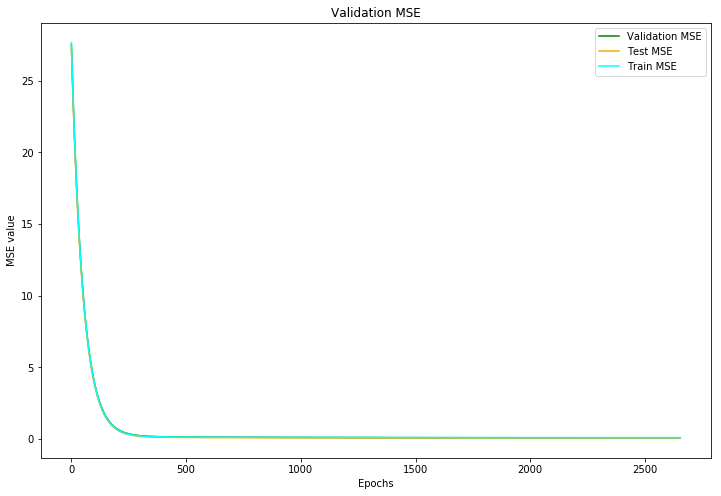

In [28]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.set_title('Validation MSE')
plt.plot(range(counter),MSEvalidation[:counter,], label="Validation MSE",color="green")
plt.plot(range(counter),MSETest[:counter,], label="Test MSE", color="orange")
plt.plot(range(counter),MSETrain[:counter,], label="Train MSE", color="cyan")

ax.set_xlabel('Epochs')
ax.set_ylabel('MSE value')
ax.legend(loc='best')

plt.show()

## 5 lines showing the fit

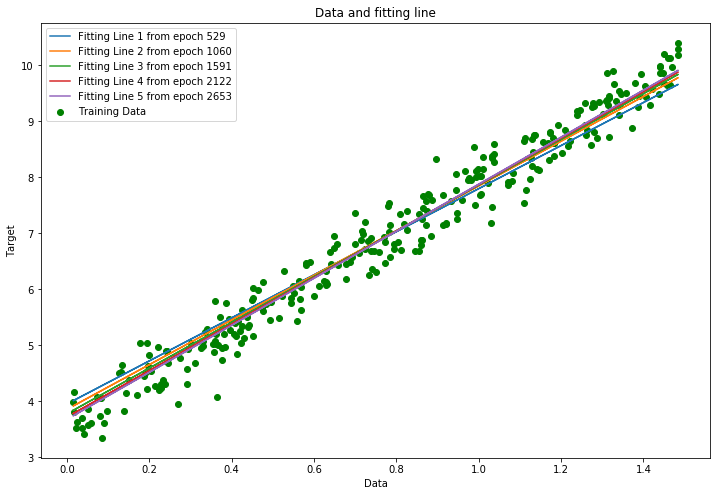

In [29]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.set_title('Data and fitting line')
ax.scatter(x=X,y=Y,label='Training Data',color='green')
for i in range(5):
    index = (int)((1+i)*counter/5)
    index = index-1
    Ynew = np.dot(myX,Warray[index])
    plt.plot(X, Ynew,label='Fitting Line %d from epoch %d'%(i+1,index))
ax.set_xlabel('Data')
ax.set_ylabel('Target')
ax.legend(loc='best');
plt.show()


## Trying different learning rates

In [463]:
W =np.ones((2,1), dtype=np.float)
epochs = 1000
alpha = 1e-6
steps = 6
rate = 5

MSEvalidation = np.zeros((steps,1))
MSETest       = np.zeros((steps,1))
MSETrain      = np.zeros((steps,1))
Warray        = np.zeros((steps,2,1))
counter =0
Threshold = 3e-05*50
for i in range(steps):
    index= np.random.permutation(train.shape[0])
    #Iterate over dataset for epochs times
    Warray[counter] = W
    for j in range(train.shape[0]):
        data = np.array(myX[index[j],:]).reshape((1, 2))
        eder = - np.power(rate,i)*alpha*2*(np.dot(np.dot(data.T,data),W) - np.dot(data.T,Y[index[j]]).reshape(2,1))
        W = W + eder;  
    diff =  np.absolute(np.sum(Warray[counter]-W))   
    MSEvalidation[i] = np.dot((Yv-np.dot(myXv,W)).T, (Yv-np.dot(myXv,W)))/Yv.shape[0]
    MSETest      [i] = np.dot((Yt-np.dot(myXt,W)).T, (Yt-np.dot(myXt,W)))/Yt.shape[0]
    MSETrain     [i] = np.dot((Y-np.dot(myX,W)).T, (Y-np.dot(myX,W)))/Y.shape[0]
    
    counter +=1
    if diff < Threshold:
        break
counter -=1


In [464]:
print MSETrain
print
print MSEvalidation
print
print MSETest
print

[[ 28.15979123]
 [ 27.88316218]
 [ 26.5404261 ]
 [ 20.73936636]
 [  6.10395426]
 [  0.14959139]]

[[ 28.0245298 ]
 [ 27.750297  ]
 [ 26.4191235 ]
 [ 20.66649921]
 [  6.13218027]
 [  0.15854452]]

[[ 27.64925003]
 [ 27.37724278]
 [ 26.05695138]
 [ 20.35309318]
 [  5.96588953]
 [  0.11892285]]



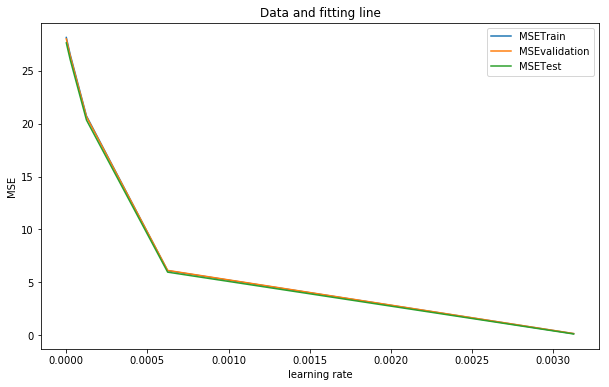

In [466]:
xAxis= np.power(rate,range(steps))*alpha
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.set_title('Data and fitting line')
#ax.scatter(x=xAxis,y=MSETrain,label='Training Data',color='green')
plt.plot(xAxis, MSETrain,label='MSETrain')
plt.plot(xAxis, MSEvalidation,label='MSEvalidation')
plt.plot(xAxis, MSETest,label='MSETest')

ax.set_xlabel('learning rate')
ax.set_ylabel('MSE')
ax.legend(loc='best');
plt.show()